## Importing Libraries and reading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.5)
%matplotlib inline

In [2]:
data = pd.read_excel('1613779-Red_wine_.xlsx')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


## Data Checks

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [6]:
# Replacing missing values in columns total sulfur dioxide and quality w/ median values
data.loc[:,'total sulfur dioxide'].\
fillna(data.loc[:,'total sulfur dioxide'].median(), inplace=True)
data.loc[:,'quality'].fillna(data.loc[:,'quality'].median(), inplace=True)
data.loc[:,'pH'].fillna(data.loc[:,'pH'].median(), inplace=True)

## EDA

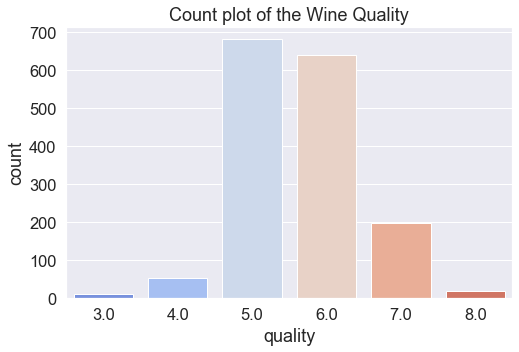

In [7]:
# Checking the value counts for the target variable
plt.figure(figsize=(8, 5))
sns.countplot(data.loc[:,'quality'], palette='coolwarm')
plt.title('Count plot of the Wine Quality')
plt.show()

In [8]:
# Function to plot histogram for column
def hist_plot(col):
    plt.figure(figsize=(8,4))
    sns.histplot(data = data, x=col)
    plt.show()

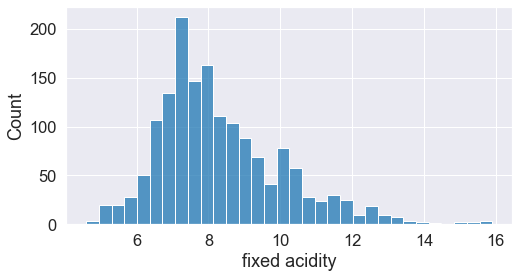

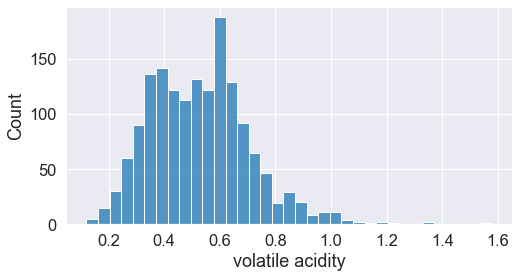

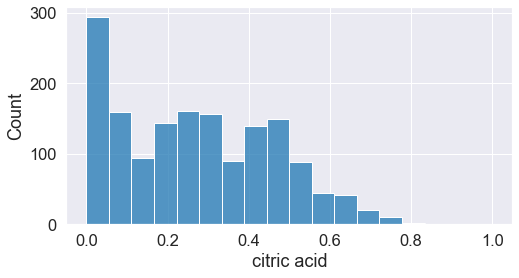

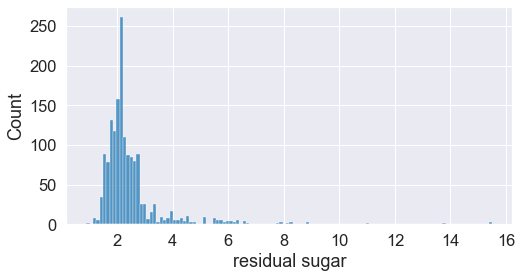

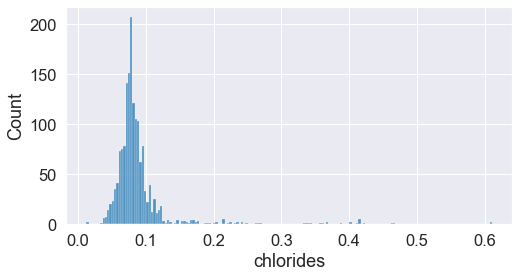

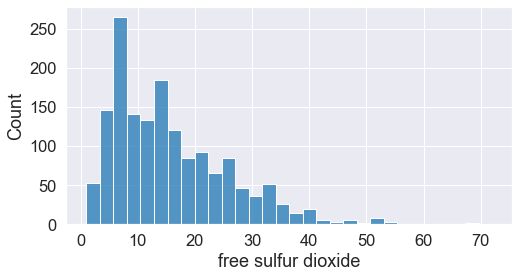

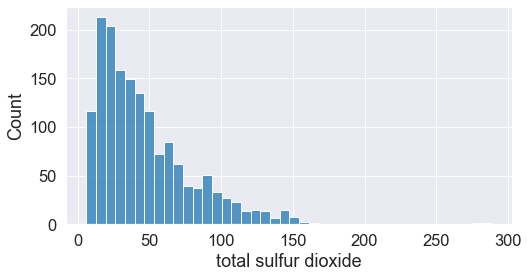

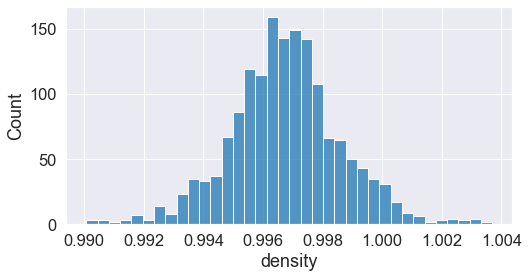

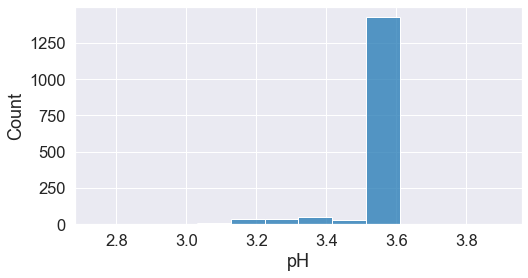

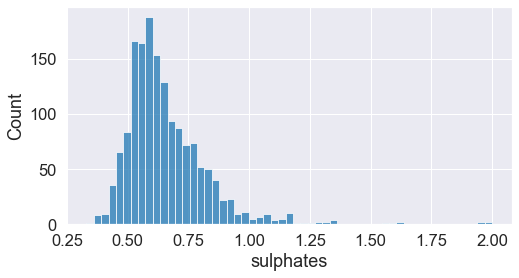

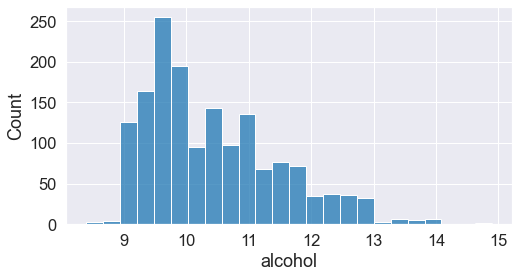

In [9]:
# Checking the histogram of each column
for col in data.columns[:-1]:
    hist_plot(col)

In [10]:
# Function for plotting box plot
def plot_box(col):
    plt.figure(figsize=(8, 4))
    sns.boxplot(data = data, x = col)
    plt.show()

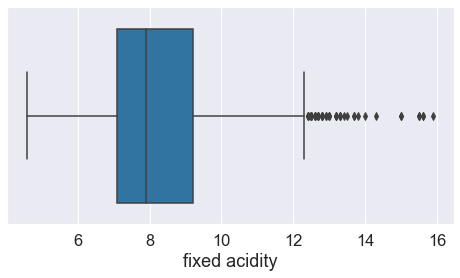

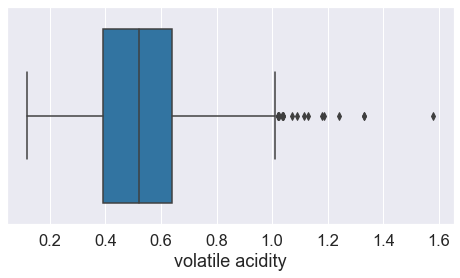

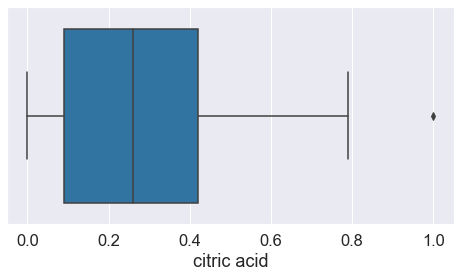

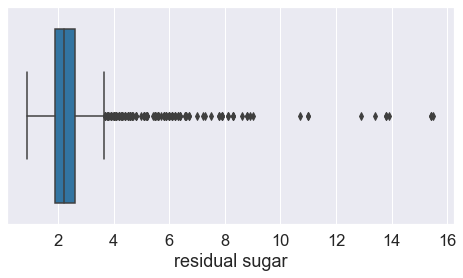

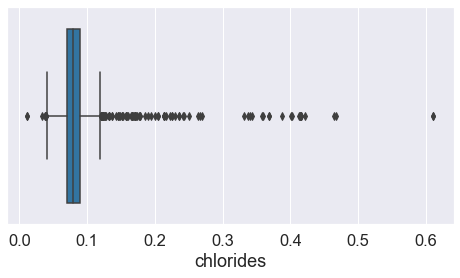

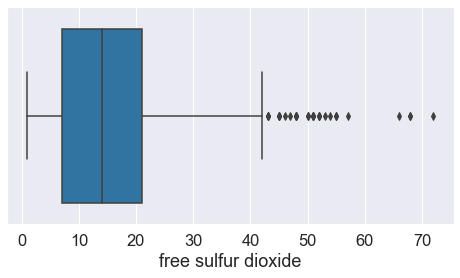

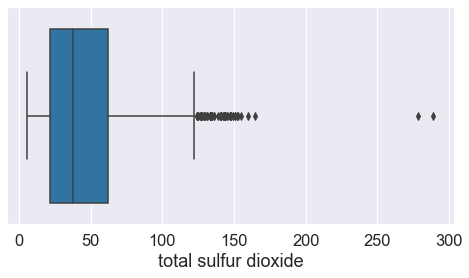

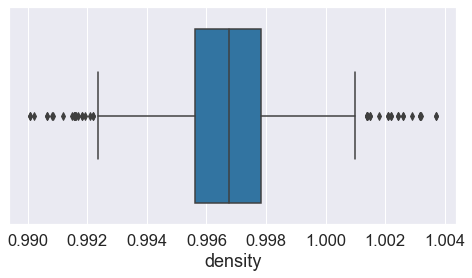

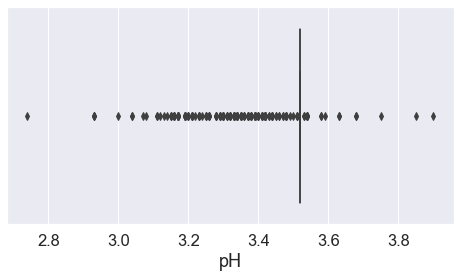

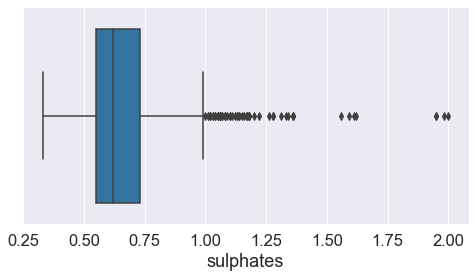

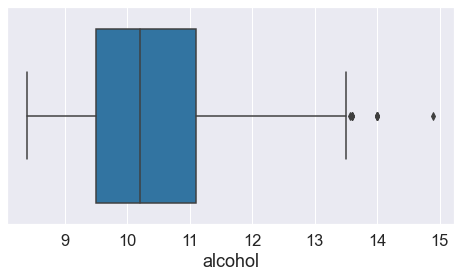

In [11]:
# Plotting a box plot to check for outliers
for col in data.columns[:-1]:
    plot_box(col)

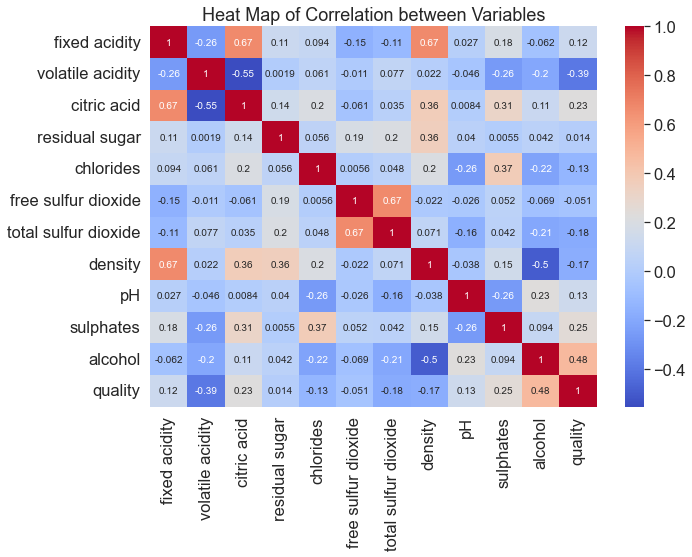

In [12]:
# Heat map to check for correlation between variables
corr = data.corr()
plt.figure(figsize=(10,7))
plt.title('Heat Map of Correlation between Variables')
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

## Feature Engineering

In [13]:
bins = [3, 6, 8]
data['quality'] = pd.cut(data['quality'], bins=bins, labels=['bad','good'])

In [14]:
# data['rating'] = np.where(data['quality']<5, 'bad',
#         np.where(data['quality']<7, 'average', 'good'))

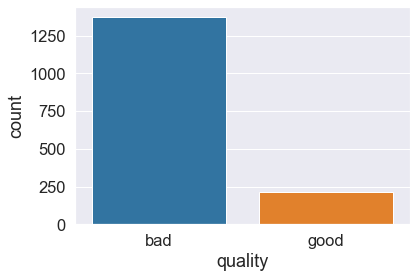

In [14]:
sns.countplot(data = data, x='quality')
plt.show()

## Data Preprocessing

In [15]:
data['quality'] = np.where(data['quality'] == 'good', 1, 0)

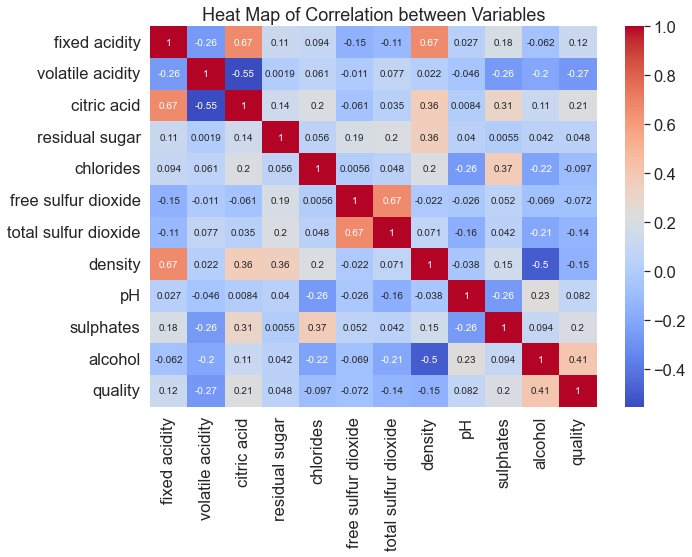

In [16]:
corr = data.corr()
plt.figure(figsize=(10,7))
plt.title('Heat Map of Correlation between Variables')
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

In [17]:
# Splitting the data into X and y
X = data.drop(['quality'], 1)
y = data['quality'].values

In [18]:
# Dividing data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,\
                                                    random_state=42, test_size=0.2)

In [19]:
# Scaling the data
scalar = MinMaxScaler()
X_train_scaled = scalar.fit_transform(X_train, y_train)
X_test_scaled = scalar.transform(X_test)

In [20]:
# Scaled data df
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X_train.columns)

In [21]:
# Feature Selection funtion using RFE
def feature_selection(X, y, n_features_to_select):
    logistic_model = LogisticRegression(random_state=42)
    logistic_model.fit(X, y)
    
    rfe = RFE(logistic_model, n_features_to_select = \
                              n_features_to_select)
    rfe_model = rfe.fit(X, y)
    
    selected_cols = [col for col in \
                     X.columns.values[rfe_model.support_]]
    
    features = X.columns.values
    ranks = rfe_model.ranking_
    
    x = pd.DataFrame()
    x['Features'] = features
    x['Rank'] = ranks
    x = x.sort_values('Rank')
    print(x)
        
    return selected_cols

In [22]:
rfe_cols = feature_selection(X_train_scaled_df, y_train, 6)

                Features  Rank
1       volatile acidity     1
2            citric acid     1
4              chlorides     1
6   total sulfur dioxide     1
9              sulphates     1
10               alcohol     1
7                density     2
0          fixed acidity     3
3         residual sugar     4
5    free sulfur dioxide     5
8                     pH     6


In [23]:
# Function to calculate max VIF
def calc_max_vif(X):
    # VIF
    vif_data = pd.DataFrame()
    vif_data["vif_feature"] = X.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [round(variance_inflation_factor(X.values, i),2)
                              for i in range(len(X.columns))]

    vif_data = vif_data.sort_values('VIF', ascending=False)
    
    max_vif = vif_data['VIF'][0]
    idx = vif_data['vif_feature'][0]
    return (idx, max_vif)

In [24]:
# Function to calculate max p_value
def get_max_p_val(X, y):
    model = sm.Logit(y, X).fit()
    p_vals = model.pvalues.sort_values(ascending=False)
    idx = p_vals.index.values[0]
    p_max = round(p_vals[0], 2)
    return(idx, p_max)

In [25]:
# custom RFE function
def custom_RFE(X, y, threshold_p = 0.05, threshold_v = 5):
    vif_col, max_vif = calc_max_vif(X)
    p_col, max_pval = get_max_p_val(X, y)
    while(max_pval > threshold_p) | (max_vif > threshold_v):
        if max_pval > threshold_p:
            print('-'*100)
            print(f'Dropping col ({p_col}) as it has a high p-value: {max_pval}')
            print('-'*100)
            X = X.drop(p_col, 1)
            p_col, max_pval = get_max_p_val(X, y)
            vif_col, max_vif = calc_max_vif(X)
        elif max_vif > threshold_v:
            print('-'*100)
            print(f'Dropping col ({vif_col}) as it has a high VIF: {max_vif}')
            print('-'*100)
            X = X.drop(vif_col, 1)
            p_col, max_pval = get_max_p_val(X, y)
            vif_col, max_vif = calc_max_vif(X)     
        
    print('-'*100)
    print("The high p-values and VIF values columns are dealt with!")
    print('-'*100)
    
    print(f"Max VIF columns:{vif_col}-----Max VIF Value={max_vif}")
    print(f"Max P columns:{p_col}-----Max P Value={max_pval}")
    
    return X.columns.values.tolist()

In [26]:
custom_RFE_cols = custom_RFE(X_train_scaled_df, y_train)

Optimization terminated successfully.
         Current function value: 0.272581
         Iterations 8
----------------------------------------------------------------------------------------------------
Dropping col (citric acid) as it has a high p-value: 0.88
----------------------------------------------------------------------------------------------------
Optimization terminated successfully.
         Current function value: 0.272590
         Iterations 8
----------------------------------------------------------------------------------------------------
Dropping col (free sulfur dioxide) as it has a high p-value: 0.27
----------------------------------------------------------------------------------------------------
Optimization terminated successfully.
         Current function value: 0.273061
         Iterations 8
----------------------------------------------------------------------------------------------------
Dropping col (fixed acidity) as it has a high VIF: 14.75
--------

## Model Building

### Logistic Model

In [27]:
# Function for evaluating the model
def eval_df(model, X_train, y_train, X_test, y_test, name=''):
    result = model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    metric_dict = {'ROC AUC Score': metrics.roc_auc_score, 
               'Precision': metrics.precision_score, 
               'Recall': metrics.recall_score,
                  'Accuracy': metrics.accuracy_score,
                  'F1 Score': metrics.f1_score}
    
    train_results = [round(val(y_train, y_train_pred), 2) \
                     for val in metric_dict.values()]
    test_results = [round(val(y_test, y_test_pred), 2) \
                    for val in metric_dict.values() ]
    
    df = pd.DataFrame()

    for idx, metric in enumerate(list(metric_dict.keys())):
        df.loc[name, f"{metric}_train"] = train_results[idx]
        df.loc[name, f"{metric}_test"] = test_results[idx]

        
    return df

In [29]:
logistic_model_rfe = LogisticRegression()

eval_df(logistic_model_rfe, X_train_scaled_df[rfe_cols], y_train,\
        X_test_scaled_df[rfe_cols], y_test, 'Logistic Regression RFE')

,ROC AUC Score_train,ROC AUC Score_test,Precision_train,Precision_test,Recall_train,Recall_test,Accuracy_train,Accuracy_test,F1 Score_train,F1 Score_test
Logistic Regression RFE,0.57,0.57,0.68,0.64,0.16,0.15,0.88,0.86,0.26,0.24


In [32]:
model_eval = eval_df(logistic_model_rfe, 
                    X_train_scaled_df[rfe_cols], y_train,
                    X_test_scaled_df[rfe_cols], y_test, 
                    'Logistic Regression RFE')

In [30]:
logistic_model_custom_rfe = LogisticRegression()
eval_df(logistic_model_custom_rfe, X_train_scaled_df[custom_RFE_cols], y_train,\
        X_test_scaled_df[custom_RFE_cols], y_test, 'Logistic Regression Custom RFE')

,ROC AUC Score_train,ROC AUC Score_test,Precision_train,Precision_test,Recall_train,Recall_test,Accuracy_train,Accuracy_test,F1 Score_train,F1 Score_test
Logistic Regression Custom RFE,0.55,0.53,0.65,0.6,0.1,0.06,0.87,0.86,0.17,0.12


In [33]:
model_eval =\
model_eval.append(eval_df(logistic_model_custom_rfe,
                          X_train_scaled_df[custom_RFE_cols], y_train, 
                          X_test_scaled_df[custom_RFE_cols], y_test, 
                          'Logistic Regression Custom RFE'))

### Random Forrest Regressor

In [34]:
rf_clf = RandomForestClassifier()


In [38]:
n_estimators = [10, 20, 50, 100, 150, 200, 300]
max_features = ['auto', 'sqrt']
max_depth = [2, 4, 6, None]
min_samples_leaf = [1, 2, 3]
criterion = ["gini", "entropy", "log_loss"]

params_grid = {"n_estimators": n_estimators,
               "max_features": max_features,
               "max_depth": max_depth,
               "criterion": criterion,
               "min_samples_leaf": min_samples_leaf}

In [39]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator=rf_clf, param_grid=params_grid, 
                       cv=3, n_jobs=-1, verbose=0)

In [40]:
model_eval = model_eval.append(eval_df(rf_grid, 
                        X_train_scaled_df[rfe_cols], y_train, 
                        X_test_scaled_df[rfe_cols], y_test, 
                        'Random Forrest RFE CV'))

In [42]:
model_eval = model_eval.append(eval_df(rf_grid, 
                        X_train_scaled_df[custom_RFE_cols], y_train, 
                        X_test_scaled_df[custom_RFE_cols], y_test, 
                        'Random Forrest Custom RFE CV'))

In [43]:
model_eval

,ROC AUC Score_train,ROC AUC Score_test,Precision_train,Precision_test,Recall_train,Recall_test,Accuracy_train,Accuracy_test,F1 Score_train,F1 Score_test
Logistic Regression RFE,0.57,0.57,0.68,0.64,0.16,0.15,0.88,0.86,0.26,0.24
Logistic Regression Custom RFE,0.55,0.53,0.65,0.60,0.10,0.06,0.87,0.86,0.17,0.12
Random Forrest RFE CV,0.98,0.74,1.00,0.75,0.96,0.51,1.00,0.90,0.98,0.61
Random Forrest Custom RFE CV,0.97,0.73,0.99,0.74,0.95,0.49,0.99,0.90,0.97,0.59


### XGBoost Model

In [45]:
xgb_clf = XGBClassifier()

In [46]:
model_eval = model_eval.append(eval_df(xgb_clf, 
                        X_train_scaled_df[rfe_cols], y_train, 
                        X_test_scaled_df[rfe_cols], y_test, 
                        'XGBoost RFE CV'))

In [48]:
model_eval = model_eval.append(eval_df(xgb_clf, 
                        X_train_scaled_df[custom_RFE_cols], y_train, 
                        X_test_scaled_df[custom_RFE_cols], y_test, 
                        'XGBoost Custom RFE CV'))

## Model Evaluation

In [50]:
model_eval

,ROC AUC Score_train,ROC AUC Score_test,Precision_train,Precision_test,Recall_train,Recall_test,Accuracy_train,Accuracy_test,F1 Score_train,F1 Score_test
Logistic Regression RFE,0.57,0.57,0.68,0.64,0.16,0.15,0.88,0.86,0.26,0.24
Logistic Regression Custom RFE,0.55,0.53,0.65,0.60,0.10,0.06,0.87,0.86,0.17,0.12
Random Forrest RFE CV,0.98,0.74,1.00,0.75,0.96,0.51,1.00,0.90,0.98,0.61
Random Forrest Custom RFE CV,0.97,0.73,0.99,0.74,0.95,0.49,0.99,0.90,0.97,0.59
XGBoost RFE CV,1.00,0.76,1.00,0.61,1.00,0.60,1.00,0.88,1.00,0.60
XGBoost Custom RFE CV,1.00,0.73,1.00,0.60,1.00,0.53,1.00,0.88,1.00,0.56


In [51]:
def plot_results(col):
    plt.figure(figsize=(9, 4))
    sns.barplot(data = model_eval, y = model_eval.index, x = col, 
                orient='h')
    plt.show()

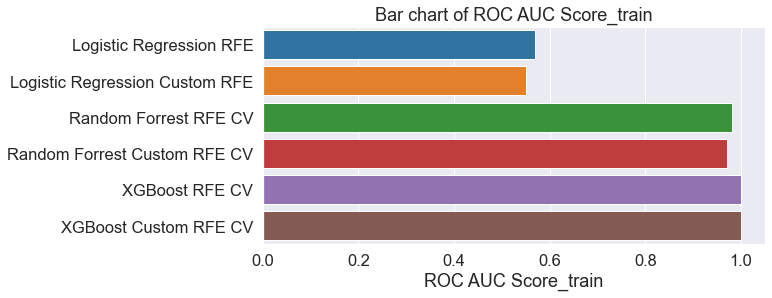

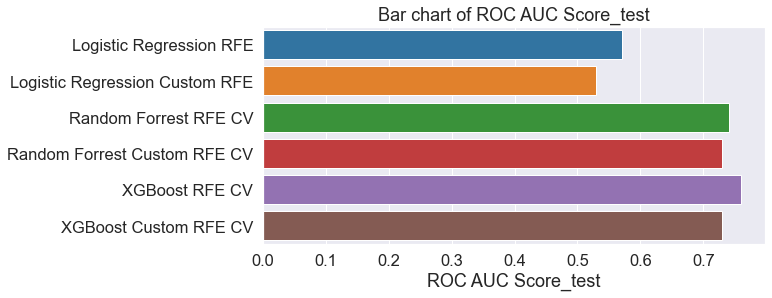

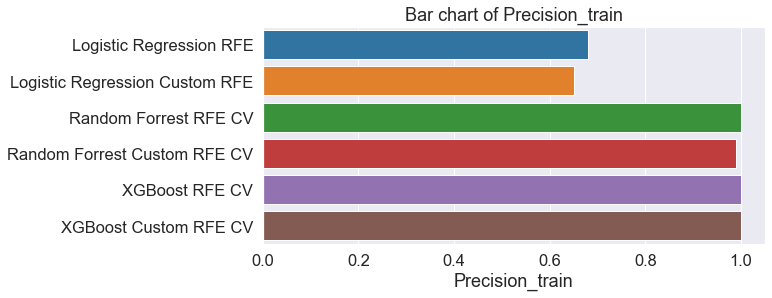

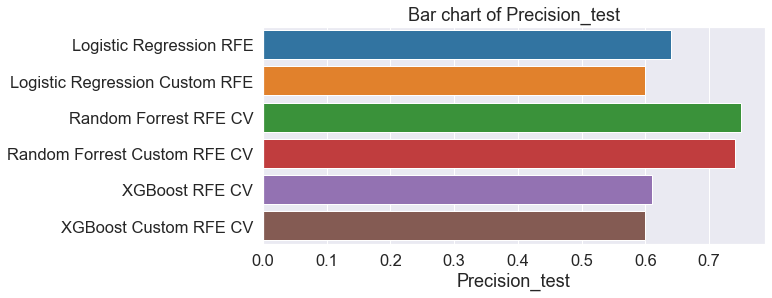

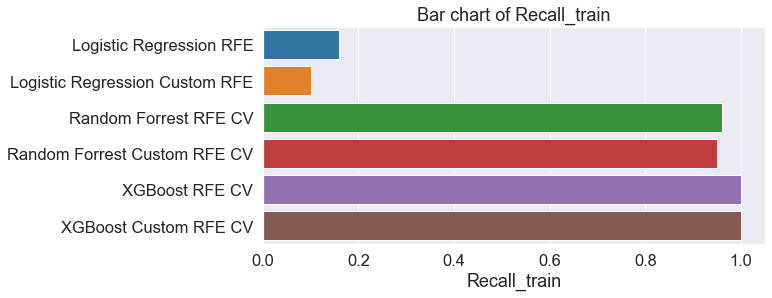

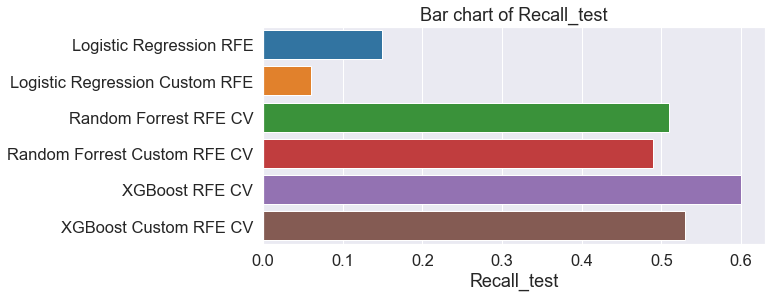

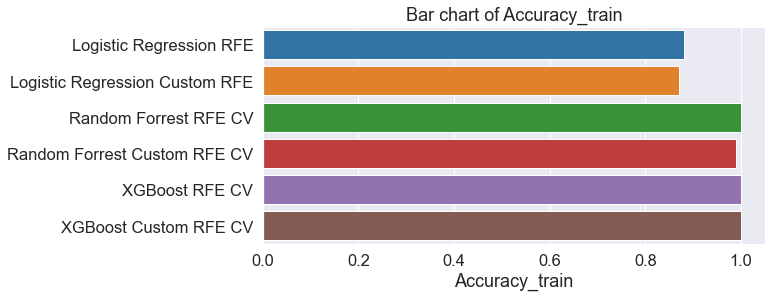

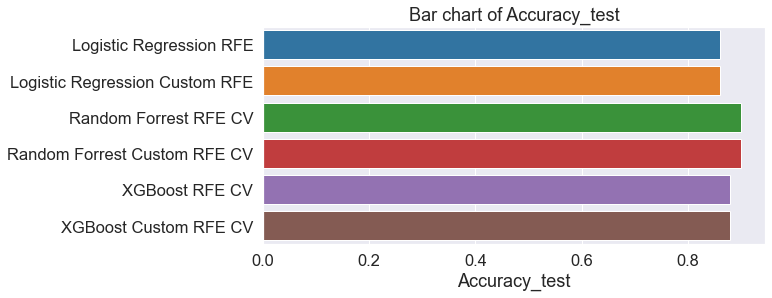

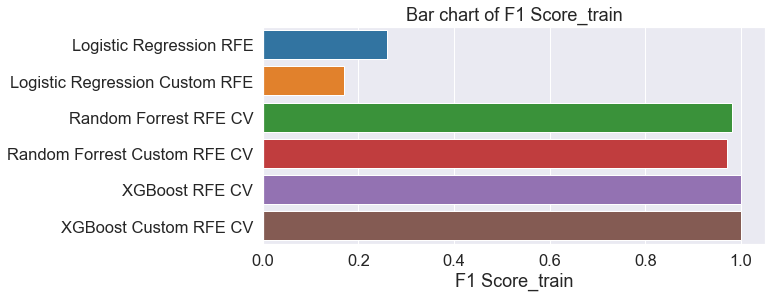

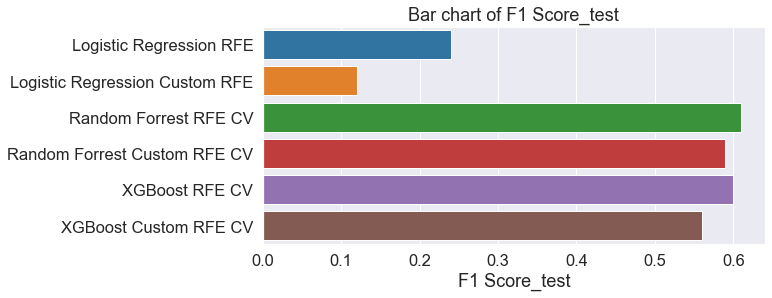

In [52]:
for col in model_eval.columns:
    plot_results(col)

### Getting the most important predictors

In [53]:
linear_model = sm.Logit(y_train, X_train_scaled_df)
results = linear_model.fit()

Optimization terminated successfully.
         Current function value: 0.272581
         Iterations 8


In [54]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1279
Model:                          Logit   Df Residuals:                     1268
Method:                           MLE   Df Model:                           10
Date:                Thu, 14 Jul 2022   Pseudo R-squ.:                  0.3045
Time:                        02:08:51   Log-Likelihood:                -348.63
converged:                       True   LL-Null:                       -501.23
Covariance Type:            nonrobust   LLR p-value:                 1.236e-59
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            2.9574      1.170      2.527      0.012       0.664       5.251
volatile acidity        -4.6871      1.299     -3.609      0.000      -7.233      -2.141
citric acid              0.1458      0.931      0.157      0.876      -1.679       1.971
residual sugar           3.4121      1.144      2.982      0.003       1.170       5.654
chlorides               -5.0831      1.965     -2.587      0.010      -8.934      -1.232
free sulfur dioxide      1.0921      0.984      1.110      0.267      -0.836       3.020
total sulfur dioxide    -6.2180      1.684     -3.692      0.000      -9.519      -2.917
density                 -3.5416      1.444     -2.452      0.014      -6.372      -0.711
pH                      -3.4276      0.949     -3.612      0.000      -5.287      -1.568
sulphates                4.6735      0.941      4.966      0.000       2.829       6.518
alcohol                  4.9382      0.879      5.615      0.000       3.214       6.662
========================================================================================
"""

In [55]:
feature_importance = pd.DataFrame(columns = ['Feature', 'Importance'])
feature_importance['Feature'] = \
                        results.params.sort_values(ascending=False).index
feature_importance['Importance'] = \
                        results.params.sort_values(ascending=False).values
feature_importance

,Feature,Importance
0,alcohol,4.938186
1,sulphates,4.673497
2,residual sugar,3.412060
3,fixed acidity,2.957399
4,free sulfur dioxide,1.092118
5,citric acid,0.145805
6,pH,-3.427572
7,density,-3.541633
8,volatile acidity,-4.687085
9,chlorides,-5.083135


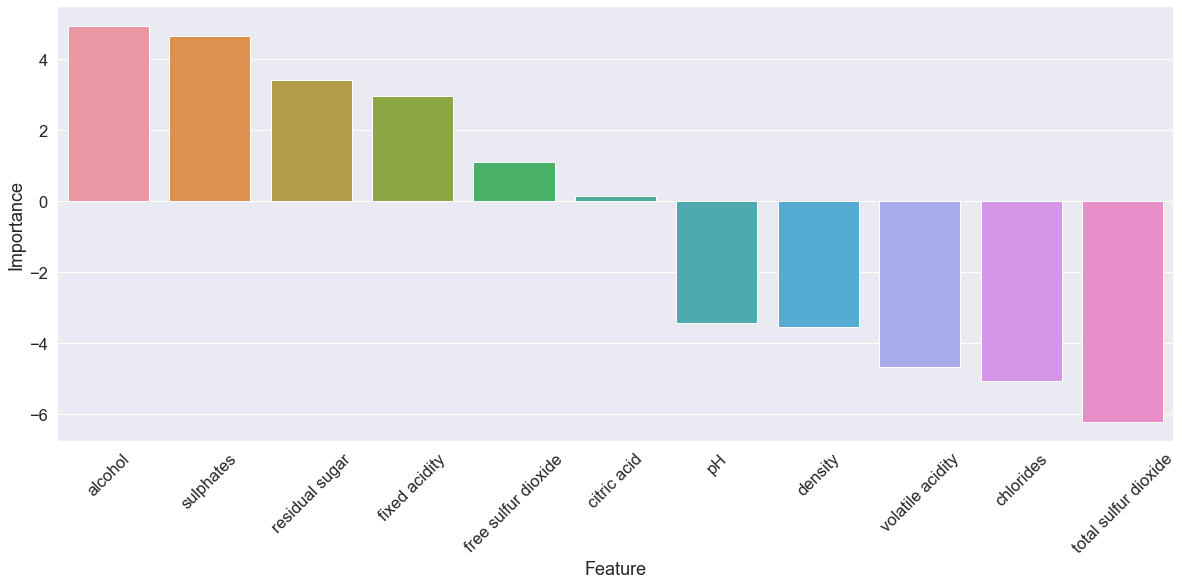

In [57]:
plt.figure(figsize=(20, 8))
sns.barplot(data = feature_importance, x = 'Feature',
                                    y = 'Importance')
plt.xticks(rotation=45)
plt.show()